## Problem Statement

Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know, it is much more expensive to sign in a  new client than keeping an existing one.

it is advantageous for banks to know what leads a client leave the branch and able to develope the programs to improve the loyalty as many  customer as possible.

To do that in this notebook we are going to solve 3 task:
    -   Analyze customer churn rate for bank because it is useful to understand why they leave.
    -   Predict the behavior of customer: leave or not
    -   Choose the model which is bring most probability to predict the chance they leave.


## Import Library needs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df =  pd.read_csv('data/churn.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Understand the Data

In [5]:
df.shape

(10000, 14)

There are 10000 rows and 14 features present for the data. We are going to see the is there any unusual data in the dataset and try to do cleaning them.


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Check Unique value in each column

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Check null

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no null value in the dataset, which can be a good site to start. We also need to see more specific in the dataset to see any data is not in the right type or wrong format.

#### Check Duplicate

In [10]:
df.duplicated().sum()

0

There is also no dupplicate row in the dataset

#### Check the basic statistic of numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Category columns


In [12]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#### Pre-Processing of Data

Dropping insingnificant columns

In [13]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

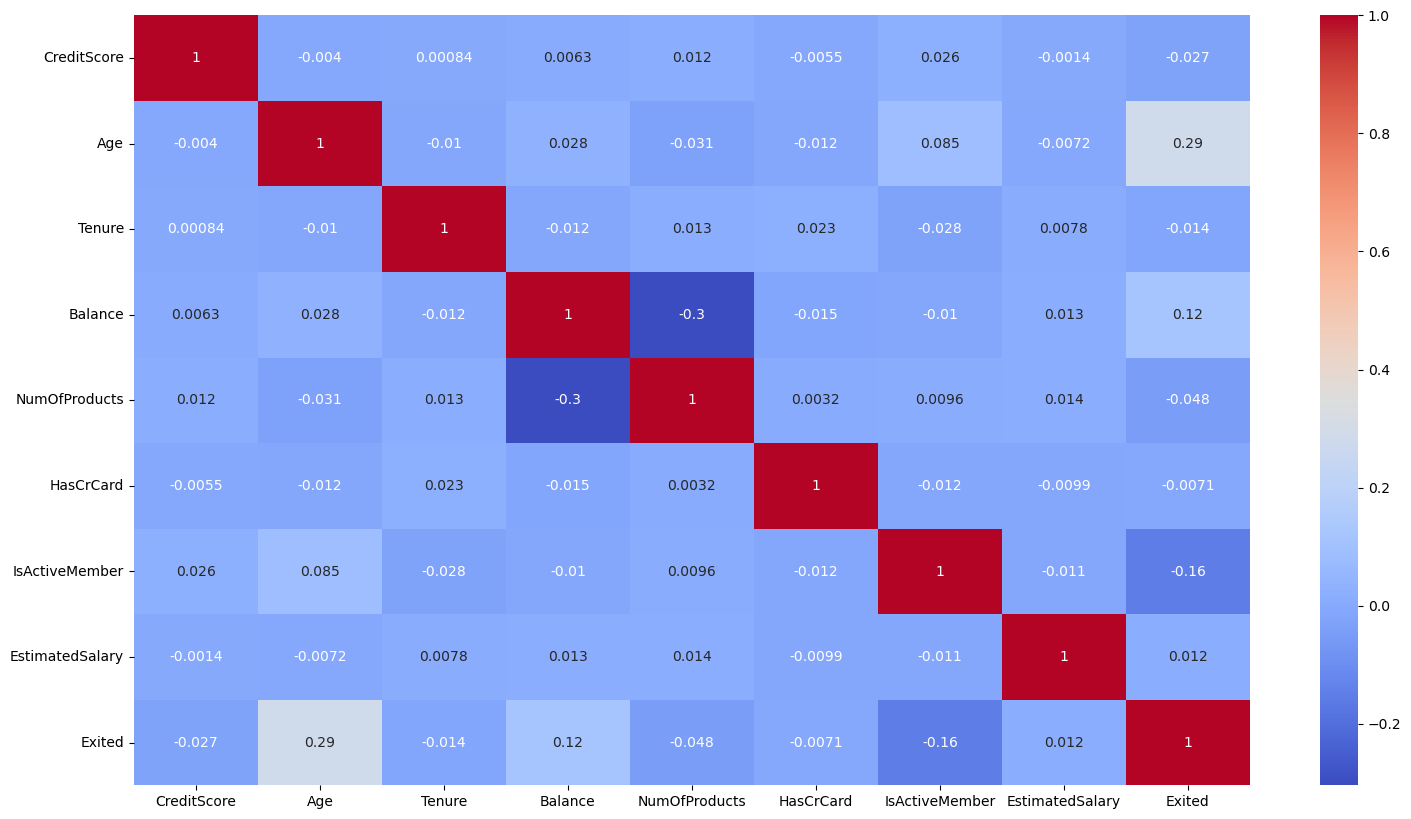

In [14]:
# Check the correlation of columns to each other

plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), yticklabels=True, cbar=True, cmap='coolwarm', annot=True)
plt.show()

As we can see from the heatmap above, there is no 2 columns show a correlation is greater than 0.5. So we are do not need to worry about there is 2 columns has same weight and dont have to delete any of them. 

## EDA

#### Transform the estimated salary columns

As we can see that all of the customer have different estimate salary and it will be very difficult for the machine learning model to use that data for the prediction. So we will set a range of that column in the range below:

    -   salary <= 25000
    -   25000< salary <= 50000
    -   50000< salary <= 75000
    -   75000< salary <= 100000
    -   100000 < salary <= 125000
    -   125000 < salary <= 150000
    -   150000 < salary <= 175000
    -   175000 < salary <= 200000

In [15]:
conditions= [
    (df['EstimatedSalary'] <= 25000),  
    ((df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000)),
    ((df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000)),
    ((df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000)),
    ((df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000)),
    ((df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000)),
    ((df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 175000)),
    ((df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000))
]

values = ['Less than 25000', '25000 - 50000', '50000 - 75000', '55000 - 100000', '100000 - 125000', '125000 - 150000', '150000 - 175000', '175000 - 200000' ]

df['SalaryRange']= np.select(conditions, values)

In [16]:
# check
df['SalaryRange'].value_counts()

125000 - 150000    1279
100000 - 125000    1276
50000 - 75000      1269
55000 - 100000     1268
175000 - 200000    1260
25000 - 50000      1236
Less than 25000    1217
150000 - 175000    1195
Name: SalaryRange, dtype: int64

#### Transform Age Columns

In [17]:
age_conditions= [
    ((df['Age']>=0) & (df['Age']<18)),
    ((df['Age']>=18) & (df['Age']<30)),
    ((df['Age']>=30) & (df['Age']<40)),
    ((df['Age']>=40) & (df['Age']<50)),
    ((df['Age']>=50) & (df['Age']<60)),
    (df["Age"] >=60)
]    

age_values= ['Minors', '18 - 30', '30 - 40', '40 - 50', '50 - 60', ' >= 60']

df['AgeGroup']= np.select(age_conditions, age_values)

In [18]:
df['AgeGroup'].value_counts()

30 - 40    4346
40 - 50    2618
18 - 30    1641
50 - 60     869
 >= 60      526
Name: AgeGroup, dtype: int64

#### Univariate Analysis

<Figure size 6000x10000 with 0 Axes>

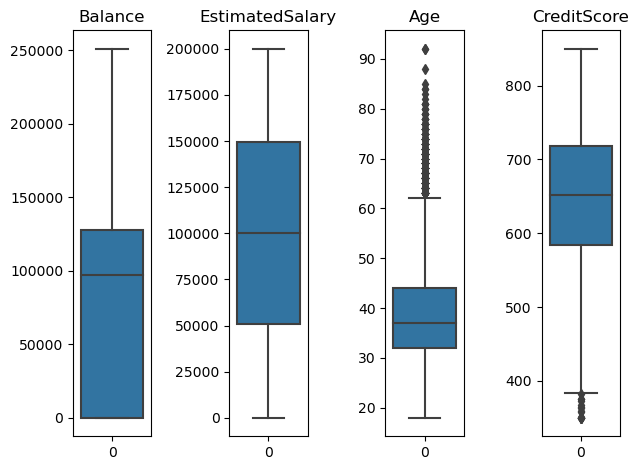

In [19]:
plt.figure(figsize=(60, 100))
# Store the list of columns

columns_to_plot = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']
# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))
# Create the box plot with Seaborn
for column, axis in zip(columns_to_plot, axes):
    sns.boxplot(data = df[column], ax= axis)
    axis.set_title(column)
#show the plot
plt.tight_layout()
plt.show()

#### Age column is skewed

In [20]:
# Right skewed
df['Age'].skew()

1.0113202630234552

In [21]:
# Log transformation to handle right skewed data
df["Agel"] = np.log(df['Age'])


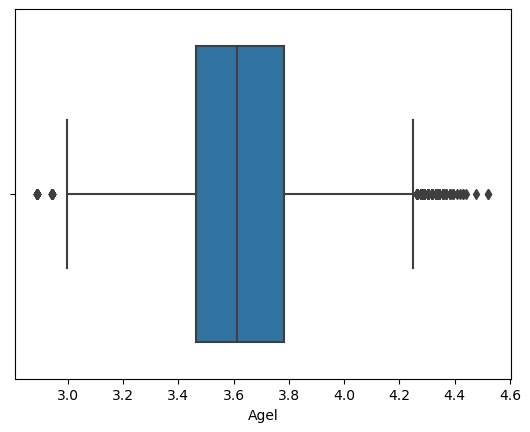

In [22]:
# check skewed after log transform

sns.boxplot(x= df['Agel'])
plt.show()

#### Bivariate Analysis

In this part, our main interest is to get an understanding as to how the given attributes relate to 'Exit' status of customer

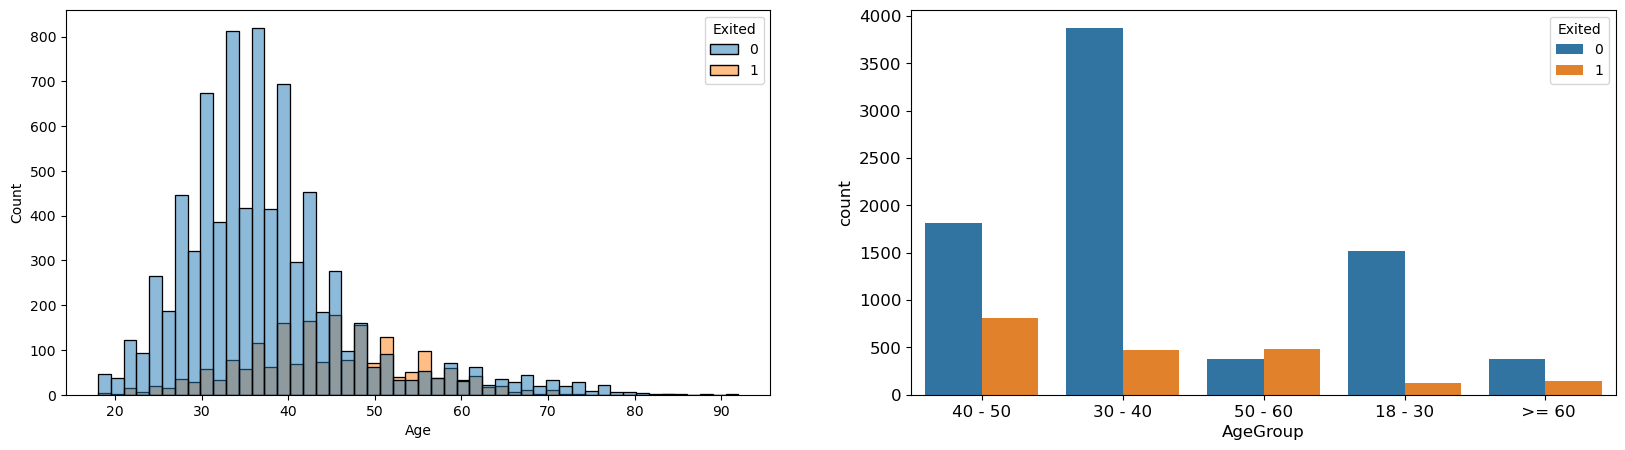

In [23]:
fig, axarr = plt.subplots(1, 2, figsize = (20, 5))
plt.xticks(size= 12)
plt.xlabel('Age Groups', size = 12)
plt.yticks(size= 12)
plt.ylabel('Number of customers', size= 12)
sns.histplot(data= df, x= 'Age', hue='Exited', bins= 50, ax= axarr[0])

plt.xticks(size= 12)
plt.xlabel('Age Groups', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size = 12)
sns.countplot(data= df, x= 'AgeGroup', hue = 'Exited', ax= axarr[1])
plt.show()

From the chart above, we can see that the range from 40-50 is the age group for which leave rate is highest. Also for age group from 50 to 60, customers left is higher stayed. Banks company should review their target market or strategy for retention between the different age groups 

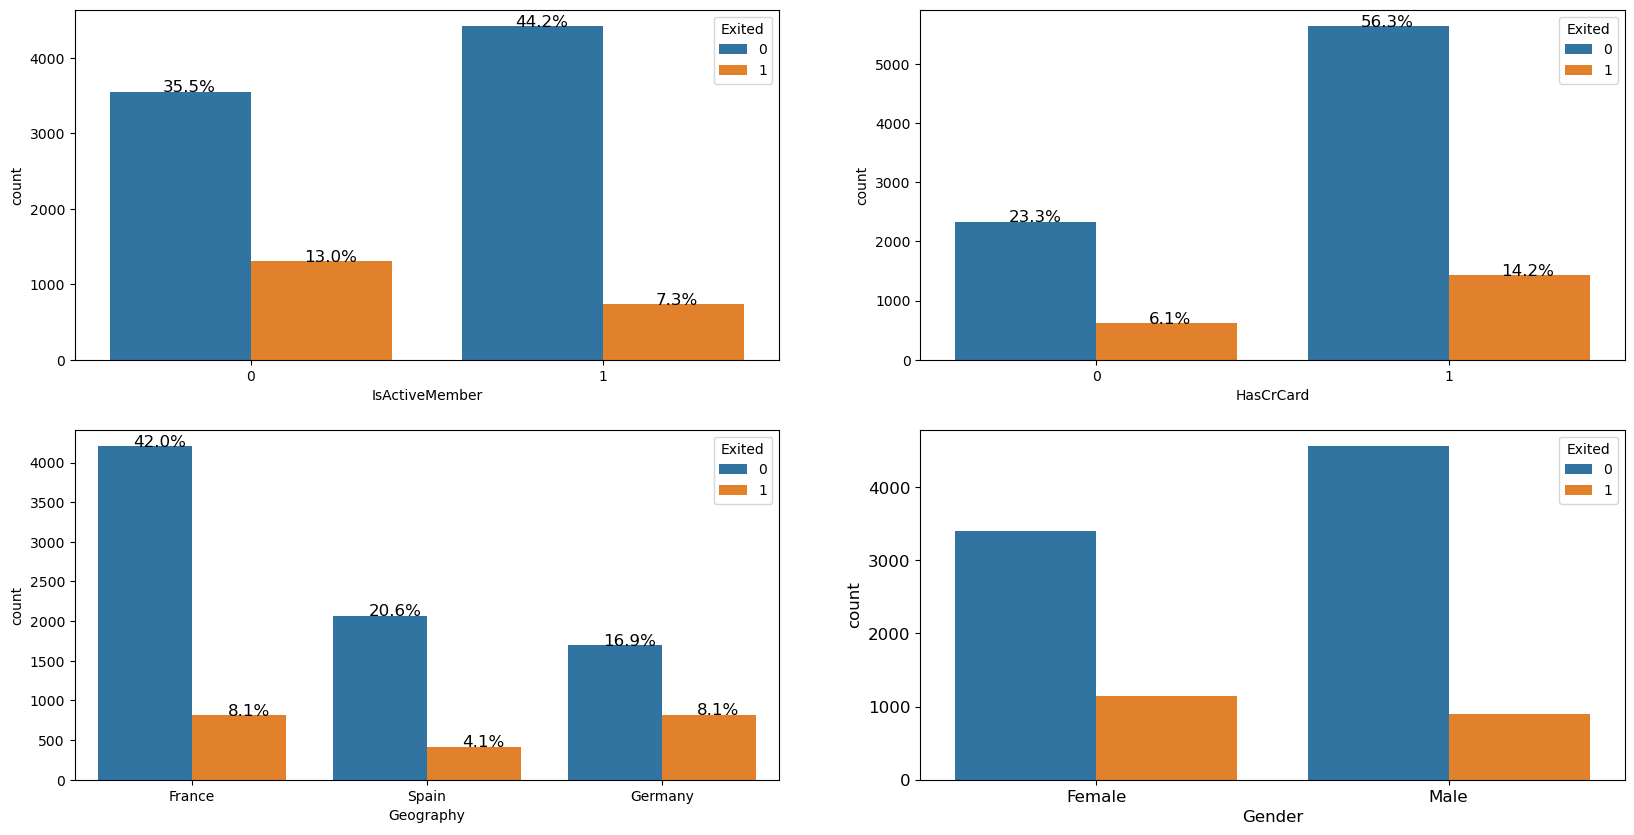

In [24]:
fig, axarr = plt.subplots(2, 2, figsize = (20, 10))

plt.xticks(size= 12)
plt.xlabel(' Is active member (Yes/No)', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
ax = sns.countplot(data= df, x= 'IsActiveMember', hue= 'Exited', ax= axarr[0][0])
total = len(df['IsActiveMember'])
for p in ax.patches:
    percentage= '{:.1f}%'.format(100 * p.get_height()/total)
    y= p.get_y()+ p.get_height()
    x= p.get_x() + p.get_width()/ 2 - 0.05
    ax.annotate(percentage, (x, y), size= 12)

plt.xticks(size= 12)
plt.xlabel(' Has Credit Card (Yes/No)', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
ax = sns.countplot(data= df, x= 'HasCrCard', hue= 'Exited', ax= axarr[0][1])
total = len(df['HasCrCard'])
for p in ax.patches:
    percentage= '{:.1f}%'.format(100 * p.get_height()/total)
    y= p.get_y()+ p.get_height()
    x= p.get_x() + p.get_width()/ 2 - 0.05
    ax.annotate(percentage, (x, y), size= 12)

plt.xticks(size= 12)
plt.xlabel(' Geography', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
ax = sns.countplot(data= df, x= 'Geography', hue= 'Exited', ax= axarr[1][0])
total = len(df['Geography'])
for p in ax.patches:
    percentage= '{:.1f}%'.format(100 * p.get_height()/total)
    y= p.get_y()+ p.get_height()
    x= p.get_x() + p.get_width()/ 2 - 0.05
    ax.annotate(percentage, (x, y), size= 12)

plt.xticks(size= 12)
plt.xlabel(' Gender', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
ax = sns.countplot(data= df, x= 'Gender', hue= 'Exited', ax= axarr[1][1])
plt.show()

#### Insight:

    -   The chances for a non-active member leaving is double the chances of an active member churning out. So bank needs to have conversation with the customer for being inactive and may give them some offer promotion or plan to keep them stay.
    -   Majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
    -   Almost half of the customers are from France followed by Spain and Germany each hav 25 percent of customers. Hence churn rate is also highest for France but Germany show the same leave rate despite lower count of customers.
    -   Male to female ratio of customers is 5:4. It is clearly that churn probability is more for a customers who is female.
     

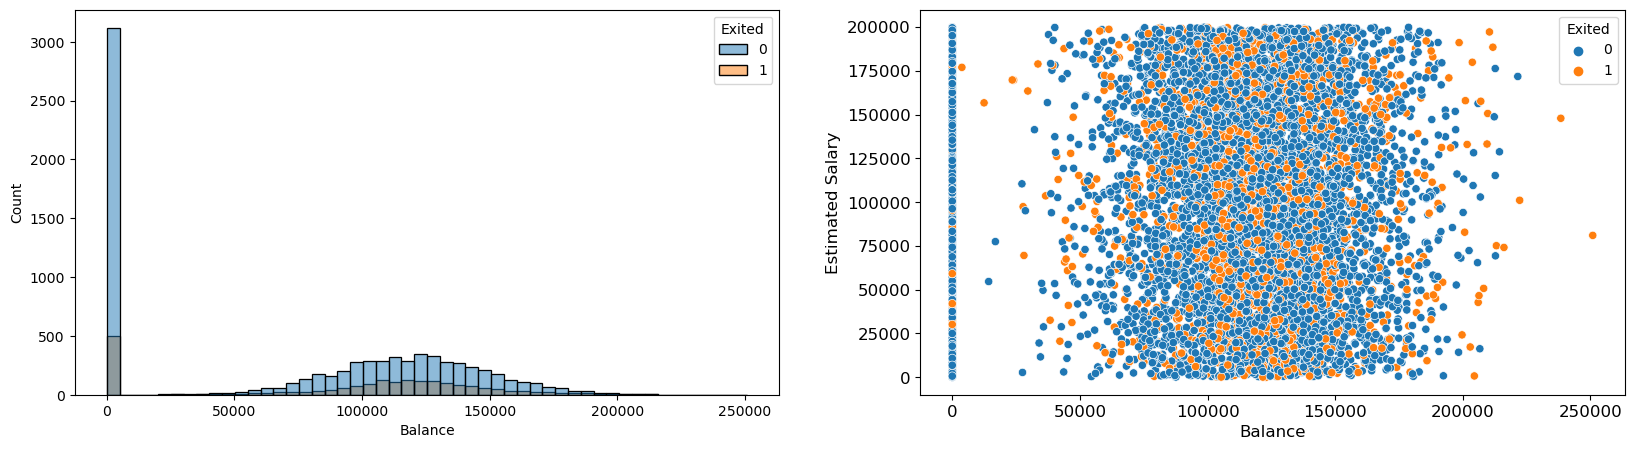

In [25]:
fig, axarr = plt.subplots(1, 2, figsize= (20, 5))

plt.xticks(size= 12)
plt.xlabel('Balance', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
ax = sns.histplot(data= df, x= 'Balance', hue= 'Exited', bins = 50, ax= axarr[0])

plt.xticks(size= 12)
plt.xlabel('Balance', size= 12)
plt.yticks(size= 12)
plt.ylabel('Estimated Salary', size= 12)
ax = sns.scatterplot(data= df, x= 'Balance', y= 'EstimatedSalary', hue= 'Exited', ax= axarr[1])
plt.show()

As we can see, the probability of customers have 0 balance churning out is highest. Many people keep 0 balance no matter how high or low of their estimated salary is.


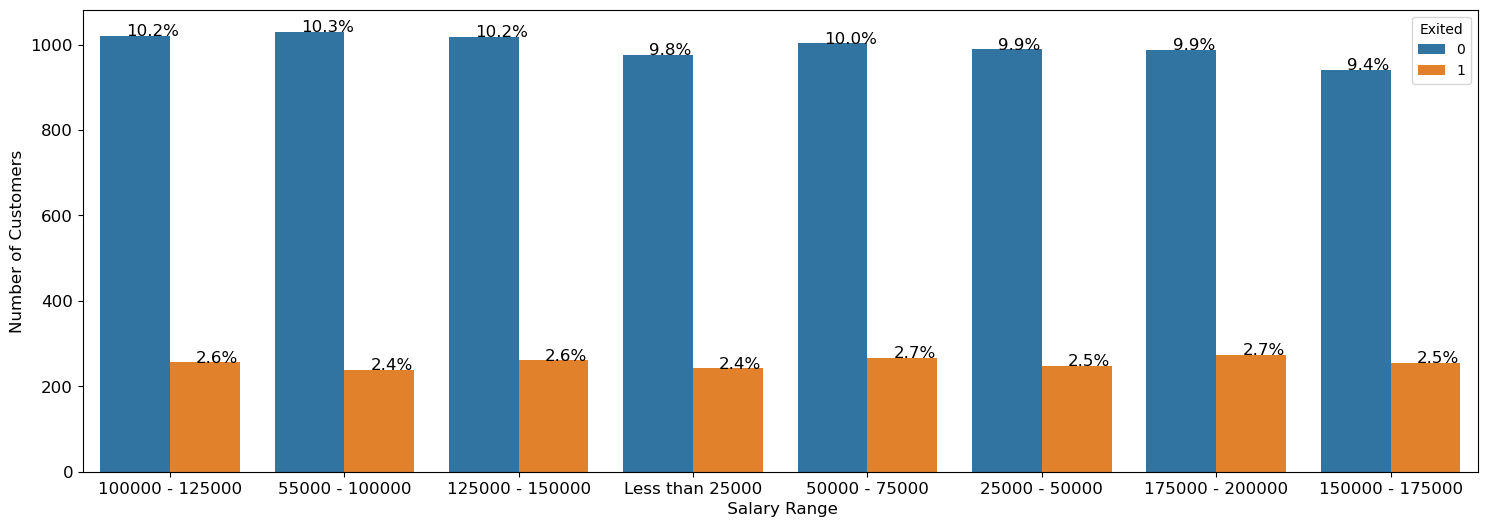

In [26]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(data= df, x= 'SalaryRange', hue= 'Exited')
plt.xticks(size= 12)
plt.xlabel(' Salary Range', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
total = len(df['SalaryRange'])
for p in ax.patches:
    percentage= '{:.1f}%'.format(100 * p.get_height()/total)
    y= p.get_y()+ p.get_height()
    x= p.get_x() + p.get_width()/ 2 - 0.05
    ax.annotate(percentage, (x, y), size= 12)
plt.show()

#### Insights
There is around 25 percent of customers have salary in range 150k to 175k and more churn rate in these customers is observed which shows bank is losing it's valuable customers.

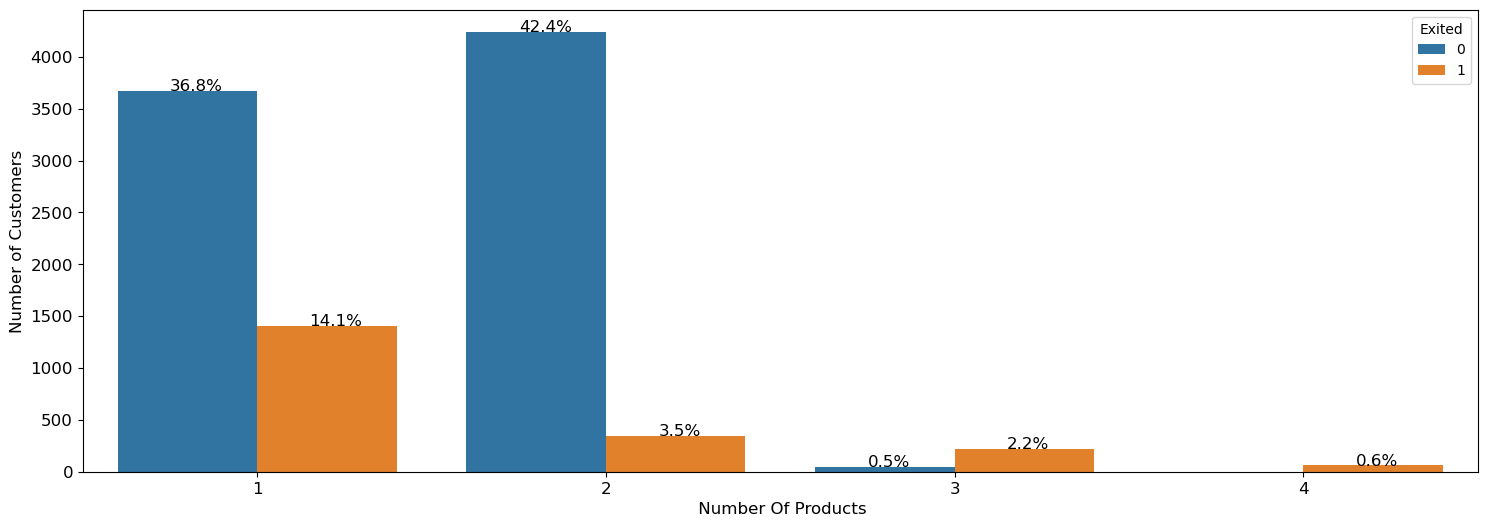

In [27]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(data= df, x= 'NumOfProducts', hue= 'Exited')
plt.xticks(size= 12)
plt.xlabel(' Number Of Products', size= 12)
plt.yticks(size= 12)
plt.ylabel('Number of Customers', size= 12)
total = len(df['NumOfProducts'])
for p in ax.patches:
    percentage= '{:.1f}%'.format(100 * p.get_height()/total)
    y= p.get_y()+ p.get_height()
    x= p.get_x() + p.get_width()/ 2 - 0.05
    ax.annotate(percentage, (x, y), size= 12)
plt.show()

As we can see that customers which use only 1 product has highest rate to leave. Bank may need to forcus on convincing this group of customers to use more product or giving more promotion and take care of this groups of customer more. 

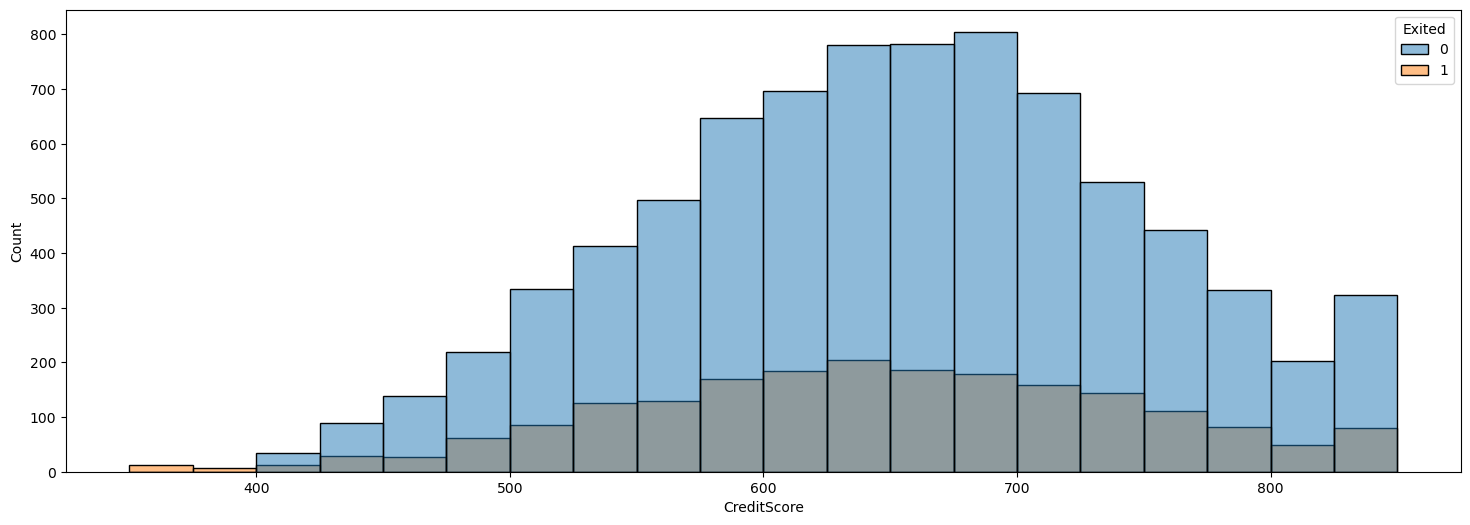

In [28]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x= 'CreditScore', bins = 20, hue= 'Exited')
plt.show()

As we can see, there is not much difference in the credit score distribution betwrrn retained and churned customers.

Now as we finish EDA, we can drop columns which is created fpr the EDA step when they are no longer need. 

In [29]:
df.drop(columns= ['SalaryRange', 'AgeGroup', 'Age'], inplace= True)

#### Target chect for balanced or Imbalanced data

In [30]:
round(df['Exited'].value_counts()/len(df)* 100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

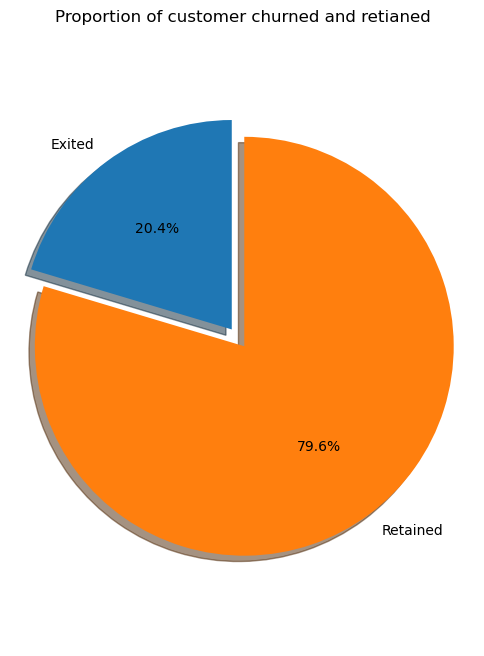

In [31]:
labels= 'Exited', 'Retained'
sizes= [df.Exited[df['Exited']== 1].count(), df.Exited[df['Exited']==0].count()]
explode= (0, 0.1)
figl, axl = plt.subplots(figsize = (6, 8))
axl.pie(sizes, explode= explode, labels= labels, autopct= '%1.1f%%', shadow= True, startangle= 90)
axl.axis('equal')
plt.title('Proportion of customer churned and retianed')
plt.show()

As we can see, 80 percent of the data belong to retained class. It is Imbalanced data.
The solution here is: we can use SMOTE to handle this or the Precision - Recall curve should be used not accuracy

#### Predictive Behaviour Modeling

About 20% of the customers have left so we need to ensure that the chosen model does predict with the best accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately prediction the customers that are stayed

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import  LogisticRegression
from imblearn.pipeline import  Pipeline


In [33]:
X= df.drop(columns=['Exited'])
y= df['Exited']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=52)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [34]:
unique, count= np.unique(y_train, return_counts=True)
target_org_valuecount= {k:v for (k, v) in zip (unique, count)}
target_org_valuecount

{0: 6384, 1: 1616}

In [35]:
X_test.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Agel
8002,590,Spain,Male,1,0.00,2,0,0,133535.99,3.610918
5438,679,France,Male,7,160515.37,1,1,0,121904.14,3.526361
2369,648,Spain,Female,7,118241.02,1,1,0,172586.89,3.988984
8370,612,France,Male,3,121394.42,1,1,0,164081.42,3.465736
7443,634,France,Female,2,87413.19,1,1,0,63340.65,3.178054


In [36]:
categorical_cols= ['Gender','Geography']

numerical_cols= ['Agel', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Tenure', 'EstimatedSalary']

Encoding and Scaling

In [37]:
prepocessor= ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numerical_cols),
        ('cal', OneHotEncoder(), categorical_cols)
    ]
)

#### SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=52)

#### Logistic Model

In [39]:
logmodel= LogisticRegression()

##### Pipeline

In [40]:
pipe= Pipeline(steps=[('preprocessor', prepocessor),
                      ('smote', smt),
                      ('logmodel', logmodel)])

#Preprocessing of training data and fit model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Agel', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cal', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('logmodel', LogisticRegression())])

In [41]:
y_predicted= pipe.predict(X_test)

In [42]:
y_predicted

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1579
           1       0.38      0.67      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000



In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as MSE

print("Training Score= ", pipe.score(X_train, y_train))
print("Testing Score= ", pipe.score(X_test, y_test))
print("MSE Score= ", MSE(y_test, y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training Score=  0.713125
Testing Score=  0.701
MSE Score=  0.299
Accuracy: 0.70
Precision: 0.38
Recall: 0.67
F1-Score: 0.49


In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[1120,  459],
       [ 139,  282]], dtype=int64)

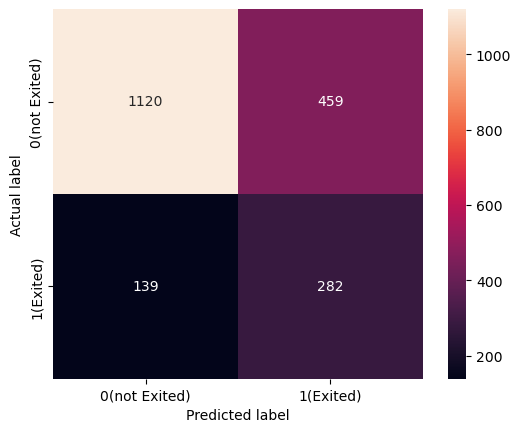

In [46]:
cnf_matrix= confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt= 'd', cbar=True,
            xticklabels=['0(not Exited)', '1(Exited)'],
            yticklabels=['0(not Exited)', '1(Exited)'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _= roc_curve(y_test, y_predicted)
roc_auc_dt= auc(fpr_dt, tpr_dt)

y_predicted= pipe.predict(X_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

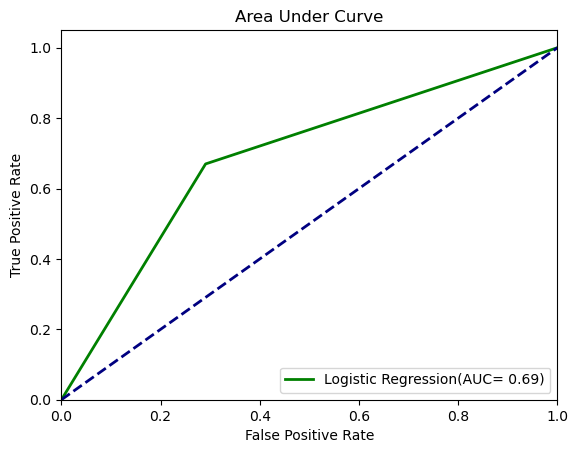

In [48]:
plt.figure(1)
lw= 2
plt.plot(fpr_dt, tpr_dt, color= 'green',
         lw= lw, label= 'Logistic Regression(AUC= %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color= 'navy', lw= lw, linestyle= '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc= 'lower right')
plt.show()

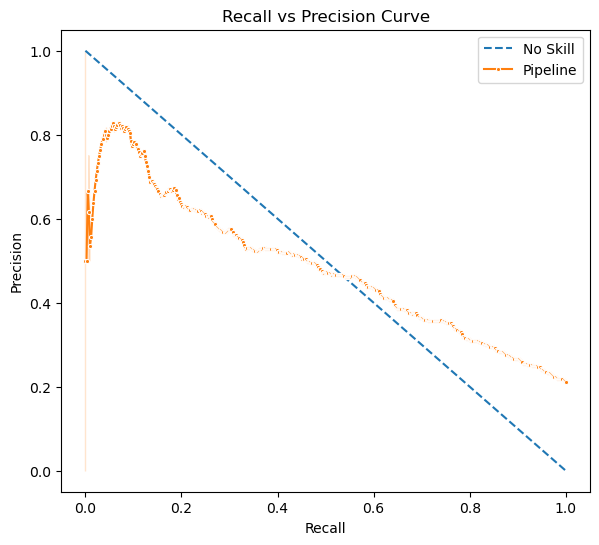

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
yhat= pipe.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])

plt.figure(dpi= 100, figsize=(15, 6))
plt.subplot(121)
sns.lineplot([0, 1], [1, 0], linestyle= '--', label= 'No Skill')
sns.lineplot(recall, precision, marker= '.', label= pipe.__class__.__name__)

plt.title('Recall vs Precision Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [50]:
col= ['Training Score', 'Testing Score', 'MSE score', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

model_log_report1= pd.DataFrame({
    'Training Score': [round(pipe.score(X_train, y_train), 2)],
    'Testing Score':[round(pipe.score(X_test, y_test), 2)],
    'MSE Score': [round(MSE(y_test, y_predicted), 2)],
    'Accuracy Score': [round(accuracy_score(y_test, y_predicted), 2)],
    'Precision Score': [round(precision_score(y_test, y_predicted), 2)],
    'Recall Score': [round(recall_score(y_test, y_predicted), 2)],
    'F1 Score': [round(f1_score(y_test, y_predicted), 2)],
},
columns=col, index=['Logistic Regression']
)

In [51]:
model_log_report1

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.7,NaN,NaN,NaN,NaN,NaN


#### Hyper Parameter Tuning for Decision Tree Using GridSearch CV

In [52]:
x= df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=52)
X_train['Gender']= X_train['Gender'].replace({'Male':1, 'Female':0})
X_train['Geography']= X_train['Geography'].replace({'Germany':1, 'France':0, 'Spain':2})

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def dtree_grid_search(X, y, nfolds):
    # Create a dictionary of all values wa want to test
    param_grid = [{
        'criterion': ['gini', 'entropy'], # Mesures split quality
        'max_features': ['auto', None], # Features considered at splits
        'max_depth': [5, 6, 8, 10, 11], # max nodes in each tree
        'min_samples_leaf': [5, 8, 10, 12, 15], # Samples required in each leaf
        'min_samples_split':[5, 10, 15, 20],# samples required to split node
    }]

    # decision tree model
    dtree_model= DecisionTreeClassifier()

    #use gridsearch to test all values
    dtree_gscv= GridSearchCV(dtree_model, param_grid, cv= nfolds)

    #fit data into the model the gridsearch

    dtree_gscv.fit(X, y)

    return dtree_gscv.best_params_

In [54]:
get_par = dtree_grid_search(X_train, y_train, 10)
get_par

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 12,
 'min_samples_split': 5}

#### Decision Tree Classfier

In [55]:
x= df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=52)

In [56]:
decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, criterion='entropy',
                                       max_features=None,
                                       min_samples_split=15, 
                                       min_samples_leaf=12)

In [57]:
pipe= Pipeline(steps=[('prepocessor', prepocessor),
                      ('smote', smt),
                      ('decision_tree', decision_tree)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Agel', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cal', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=15,
                                        random_state=52))])

In [58]:
y_predicted = pipe.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error as MSE

print("Training Score: ", pipe.score(X_train, y_train))
print("Test Score: ", pipe.score(X_test, y_test))
print("MSE Score: ", MSE(y_test, y_predicted))

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision Score: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall Score: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_predicted)))



Training Score:  0.78875
Test Score:  0.7885
MSE Score:  0.2115
Accuracy Score: 0.79
Precision Score: 0.5
Recall Score: 0.76
F1 Score: 0.60


In [60]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_predicted)
roc_auc_dt= auc(fpr_dt, tpr_dt)

y_predicted= pipe.predict(X_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

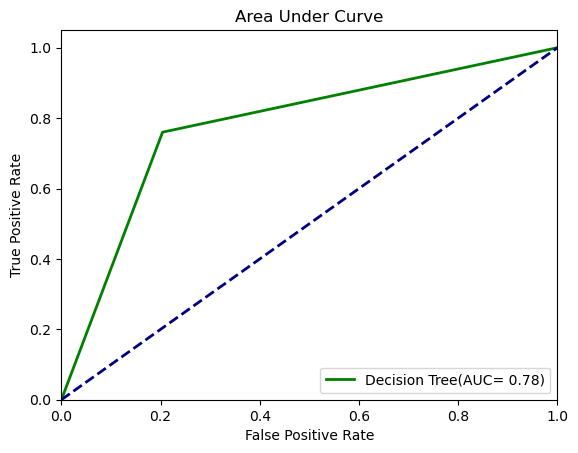

In [61]:
plt.figure(1)
lw= 2
plt.plot(fpr_dt, tpr_dt, color= 'green',
         lw= lw, label= 'Decision Tree(AUC= %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color= 'navy', lw= lw, linestyle= '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc= 'lower right')
plt.show()

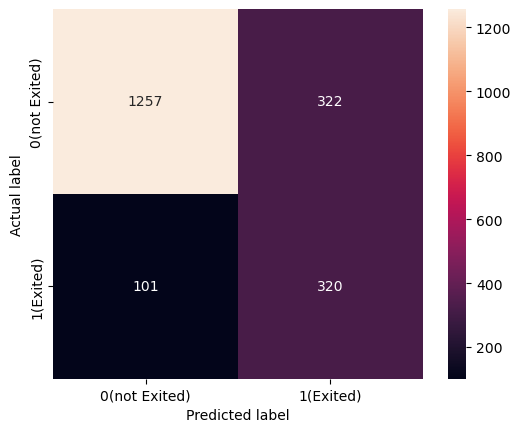

In [62]:
cnf_matrix= confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt= 'd', cbar=True,
            xticklabels=['0(not Exited)', '1(Exited)'],
            yticklabels=['0(not Exited)', '1(Exited)'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
model_log_report2= pd.DataFrame({
    'Training Score': [round(pipe.score(X_train, y_train), 2)],
    'Testing Score':[round(pipe.score(X_test, y_test), 2)],
    'MSE Score': [round(MSE(y_test, y_predicted), 2)],
    'Accuracy Score': [round(accuracy_score(y_test, y_predicted), 2)],
    'Precision Score': [round(precision_score(y_test, y_predicted), 2)],
    'Recall Score': [round(recall_score(y_test, y_predicted), 2)],
    'F1 Score': [round(f1_score(y_test, y_predicted), 2)],
},
columns=col, index=['Decision Tree'])
model_log_report2

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Decision Tree,0.79,0.79,NaN,NaN,NaN,NaN,NaN


#### Hyper Parameter Tuning for Random Forest Using GridSearchCV

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
x= df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=52)
X_train['Gender']= X_train['Gender'].replace({'Male':1, 'Female':0})
X_train['Geography']= X_train['Geography'].replace({'Germany':1, 'France':0, 'Spain':2})

In [66]:
def ran_for_grid_search(X, y, nfolds):
    # Create a dictionary of all values wa want to test
    param_grid = [{
        'criterion': ['gini', 'entropy'], # Mesures split quality
        'n_estimators': [50, 100, 200], #number trees to grow
        # 'max_features': ['auto', None], # Features considered at splits
        'max_depth': [5, 6, 8, 10, 11], # max nodes in each tree
        'min_samples_leaf': [5, 8, 10, 12, 15], # Samples required in each leaf
        'min_samples_split':[5, 10, 15, 20],# samples required to split node
    }]

    # Random forest model
    rfor_model= RandomForestClassifier()

    #use gridsearch to test all values
    rfor_gscv= GridSearchCV(rfor_model, param_grid, cv= nfolds)

    #fit data into the model the gridsearch

    rfor_gscv.fit(X, y)

    return rfor_gscv.best_params_

In [67]:
best_par= ran_for_grid_search(X_train, y_train, 10)

In [68]:
best_par

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 50}

#### Random Forest Classifier

In [69]:
x= df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=52)

In [70]:
random_forest= RandomForestClassifier(max_depth=10,
                                      n_estimators=50, random_state=52,
                                      max_features=None,
                                      bootstrap=True,
                                      min_samples_leaf=5,
                                      min_samples_split=5,
                                      criterion='gini')

In [71]:
pipe = Pipeline(steps=[('preprocessor', prepocessor),
                       ('smote', smt),
                       ('random_forest', random_forest)])

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Agel', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cal', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('random_forest',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=50, random_state=52))])

In [73]:
y_predicted= pipe.predict(X_test)

In [74]:

print("Training Score: ", pipe.score(X_train, y_train))
print("Test Score: ", pipe.score(X_test, y_test))
print("MSE Score: ", MSE(y_test, y_predicted))

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision Score: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall Score: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training Score:  0.873375
Test Score:  0.8295
MSE Score:  0.1705
Accuracy Score: 0.83
Precision Score: 0.58
Recall Score: 0.72
F1 Score: 0.64


In [75]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_predicted)
roc_auc_dt= auc(fpr_dt, tpr_dt)

y_predicted= pipe.predict(X_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

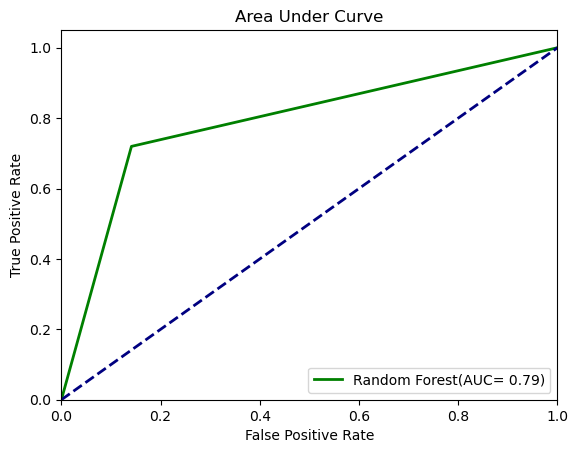

In [76]:
plt.figure(1)
lw= 2
plt.plot(fpr_dt, tpr_dt, color= 'green',
         lw= lw, label= 'Random Forest(AUC= %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color= 'navy', lw= lw, linestyle= '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc= 'lower right')
plt.show()

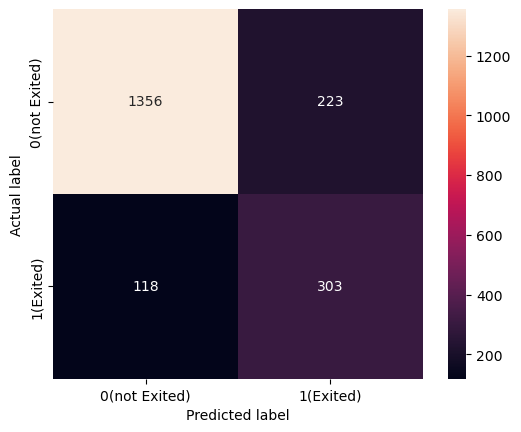

In [77]:
cnf_matrix= confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt= 'd', cbar=True,
            xticklabels=['0(not Exited)', '1(Exited)'],
            yticklabels=['0(not Exited)', '1(Exited)'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [78]:
model_log_report3= pd.DataFrame({
    'Training Score': [round(pipe.score(X_train, y_train), 2)],
    'Testing Score':[round(pipe.score(X_test, y_test), 2)],
    'MSE Score': [round(MSE(y_test, y_predicted), 2)],
    'Accuracy Score': [round(accuracy_score(y_test, y_predicted), 2)],
    'Precision Score': [round(precision_score(y_test, y_predicted), 2)],
    'Recall Score': [round(recall_score(y_test, y_predicted), 2)],
    'F1 Score': [round(f1_score(y_test, y_predicted), 2)],
},
columns=col, index=['Random Forest'])
model_log_report3

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Random Forest,0.87,0.83,NaN,NaN,NaN,NaN,NaN


### Boosting Algorithms

#### Hyper parameter tuning using GridSearch CV

In [79]:
import xgboost as xgb

x= df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=52)

X_train['Gender']= X_train['Gender'].replace({'Male':1, 'Female':0})
X_train['Geography']= X_train['Geography'].replace({'Germany':1, 'France':0, 'Spain':2})


In [80]:
def xgboost_grid_search(X, y, nfolds):
    # Create a dictionary of all values wa want to test
    param_grid = [{
        'learning_rate':[0.01, 0.1, 0.2],
        'reg_lambda':[1, 2],
        'max_depth': [6, 8], # max nodes in each tree
        'gamma':[2, 4], #minimum loss reduction on partitions; higer = more
        'subsample':[0.6, 0.8], #ratio of the training used to grow each tree
        'colsample_bytree':[0.7, 0.9],
        'n_estimators':[100, 200, 250] # number of trees to grow
    }]

    # decision tree model
    xgboost_model= xgb.XGBClassifier()

    #use gridsearch to test all values
    xgboost_gscv= GridSearchCV(xgboost_model, param_grid, cv= nfolds)

    #fit data into the model the gridsearch
    xgboost_gscv.fit(X, y)

    return xgboost_gscv.best_params_

In [81]:
best_par= xgboost_grid_search(X_train, y_train, 10)
best_par

{'colsample_bytree': 0.7,
 'gamma': 2,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 250,
 'reg_lambda': 2,
 'subsample': 0.6}

#### XG Boost

In [82]:
x= df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=52)

In [83]:
xgb= xgb.XGBClassifier(random_state= 52, 
                       colsample_bytree= 0.7,
                       gamma= 4,
                       learning_rate= 0.1,
                       max_depth= 6,
                       n_estimators= 100,
                       reg_lambda= 1,
                       subsample= 0.8)

In [84]:
pipe= Pipeline(steps=[('preprocessor', prepocessor),
                       ('smote', smt),
                       ('xgb', xgb)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Agel', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cal', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=4, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               

In [85]:
y_predicted= pipe.predict(X_test)

In [86]:

print("Training Score: ", pipe.score(X_train, y_train))
print("Test Score: ", pipe.score(X_test, y_test))
print("MSE Score: ", MSE(y_test, y_predicted))

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision Score: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall Score: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training Score:  0.881625
Test Score:  0.863
MSE Score:  0.137
Accuracy Score: 0.86
Precision Score: 0.69
Recall Score: 0.62
F1 Score: 0.66


In [87]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_predicted)
roc_auc_dt= auc(fpr_dt, tpr_dt)

y_predicted= pipe.predict(X_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

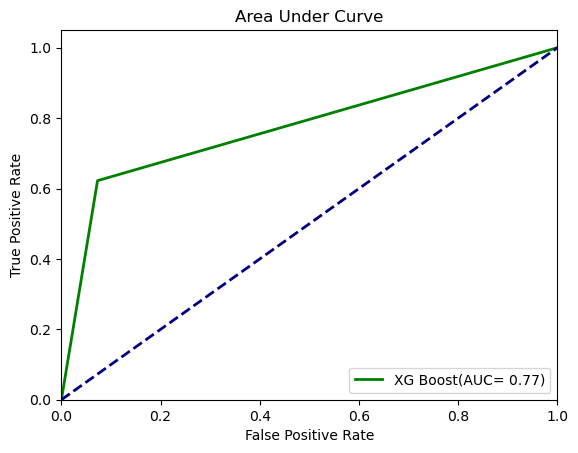

In [88]:
plt.figure(1)
lw= 2
plt.plot(fpr_dt, tpr_dt, color= 'green',
         lw= lw, label= 'XG Boost(AUC= %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color= 'navy', lw= lw, linestyle= '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc= 'lower right')
plt.show()

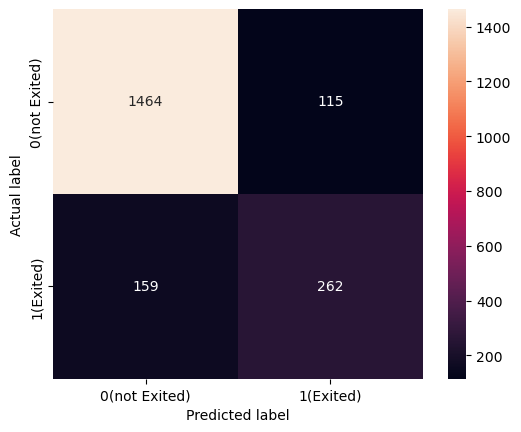

In [89]:
cnf_matrix= confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt= 'd', cbar=True,
            xticklabels=['0(not Exited)', '1(Exited)'],
            yticklabels=['0(not Exited)', '1(Exited)'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
model_log_report4= pd.DataFrame({
    'Training Score': [round(pipe.score(X_train, y_train), 2)],
    'Testing Score':[round(pipe.score(X_test, y_test), 2)],
    'MSE Score': [round(MSE(y_test, y_predicted), 2)],
    'Accuracy Score': [round(accuracy_score(y_test, y_predicted), 2)],
    'Precision Score': [round(precision_score(y_test, y_predicted), 2)],
    'Recall Score': [round(recall_score(y_test, y_predicted), 2)],
    'F1 Score': [round(f1_score(y_test, y_predicted), 2)],
},
columns=col, index=['XGboost'])
model_log_report4


Accuracy Score: 0.86
Precision Score: 0.69
Recall Score: 0.62
F1 Score: 0.66


#### Compairing all the models

##### We need confidence in our positive class predictions when taking retention actions

In [96]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3,model_log_report4))

In [97]:
model_comp

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.70,NaN,NaN,NaN,NaN,NaN
Decision Tree,0.79,0.79,NaN,NaN,NaN,NaN,NaN
Random Forest,0.87,0.83,NaN,NaN,NaN,NaN,NaN
XGboost,0.88,0.86,NaN,NaN,NaN,NaN,NaN
